# Decoding Tennis Dynamics: Analyzing How Strategic Shot Selection Evolves Over The Years

How does tennis shot selection evolve over the years in terms of frequency for men’s matches, with specific shots such as forehand, backhand, serves, etc.? Furthermore, how has the server win percentage in service games changed over the years, especially when considering the percentage of serves that land as a first serve compared to a second serve?

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

sns.set_theme() # reset theme to default

In [ ]:
# getting overview of charing stats
df1 = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-stats-Overview.csv", encoding="ISO-8859-1")
df1['year'] = df1['match_id'].str[:4].astype(int)
df1 = df1[df1["set"] != "Total"]
df1.head()

,match_id,player,set,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,...,bp_saved,return_pts,return_pts_won,winners,winners_fh,winners_bh,unforced,unforced_fh,unforced_bh,year
2,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,1,26,2,0,15,10,11,6,...,1,18,13,10,3,5,6,2,4,1975
3,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,1,18,0,0,11,3,7,2,...,0,26,10,4,2,2,10,7,3,1975
4,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,2,24,0,0,10,9,14,8,...,1,26,10,9,3,6,6,2,4,1975
5,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,2,2,26,2,1,18,12,8,4,...,2,24,7,8,5,1,8,4,3,1975
6,19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Bo...,1,3,19,0,1,7,6,12,7,...,2,19,13,9,4,5,4,2,1,1975


In [ ]:
# merging the data sets 2009, 2010s, 2020 into one df
points_2009_df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-to-2009.csv", encoding="ISO-8859-1")
points_2010s_df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-2010s.csv", encoding="ISO-8859-1")
points_2020s_df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-2020s.csv", encoding="ISO-8859-1")

points_df = pd.concat([points_2009_df, points_2010s_df, points_2020s_df])
points_df['year'] = points_df['match_id'].str[:4].astype(int)

<ipython-input-2-cb2873f73270>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  points_2009_df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-to-2009.csv", encoding="ISO-8859-1")
<ipython-input-2-cb2873f73270>:3: DtypeWarning: Columns (8,9,29) have mixed types. Specify dtype option on import or set low_memory=False.
  points_2010s_df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-2010s.csv", encoding="ISO-8859-1")
<ipython-input-2-cb2873f73270>:4: DtypeWarning: Columns (8,9,29) have mixed types. Specify dtype option on import or set low_memory=False.
  points_2020s_df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-2020s.csv", encoding="ISO-8859-1")


<Axes: title={'center': '2nd Serve In %'}, xlabel='year', ylabel='2ndIn'>

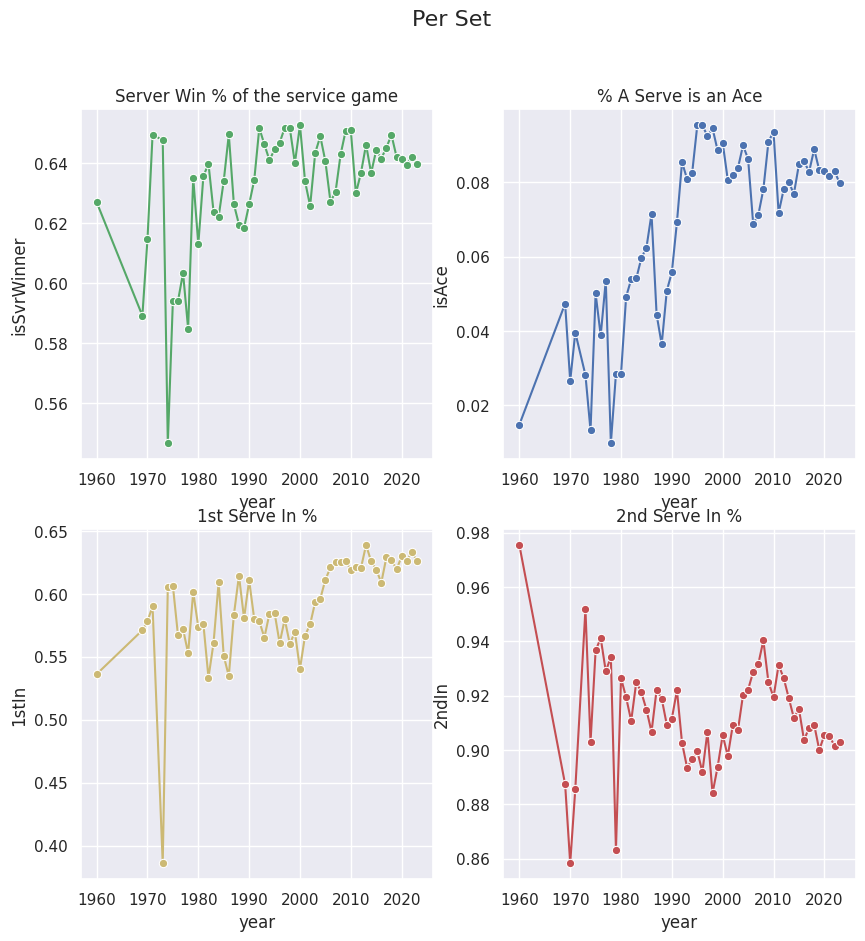

In [ ]:
points_by_year = points_df.select_dtypes(include=['number', 'bool']).groupby('year').mean()
points_by_year["point_count"] = points_df.groupby('year').size()
points_by_year.reset_index(inplace=True)
sufficient_points_by_year = points_by_year.loc[points_by_year['point_count'] > 300]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle('Per Set ', fontsize=16)

axes[0,0].set_title("Server Win % of the service game")
axes[0,1].set_title("% A Serve is an Ace")
axes[1,0].set_title("1st Serve In %")
axes[1,1].set_title("2nd Serve In %")

sns.lineplot(x='year', y="isSvrWinner", data=sufficient_points_by_year, marker='o', linestyle='-', color='g', ax=axes[0][0])
sns.lineplot(x='year', y="isAce", data=sufficient_points_by_year, marker='o', linestyle='-', color='b', ax=axes[0][1])

sns.lineplot(x='year', y="1stIn", data=sufficient_points_by_year, marker='o', linestyle='-', color='y', ax=axes[1][0])
sns.lineplot(x='year', y="2ndIn", data=sufficient_points_by_year, marker='o', linestyle='-', color='r', ax=axes[1][1])

In [ ]:
def winning_shot(sequence):
  pattern = r"[a-z][0-3](?=[^a-z]*\*$)" # does not capture some details (net, return area, etc.)
  matches = re.findall(pattern, sequence)
  return matches[-1][0] if matches else ""

points_df['rally_seq'] = np.where(points_df['2nd'].notna(), points_df['2nd'], points_df['1st'])
points_df['rally_winning_shot'] = points_df['rally_seq'].apply(winning_shot)

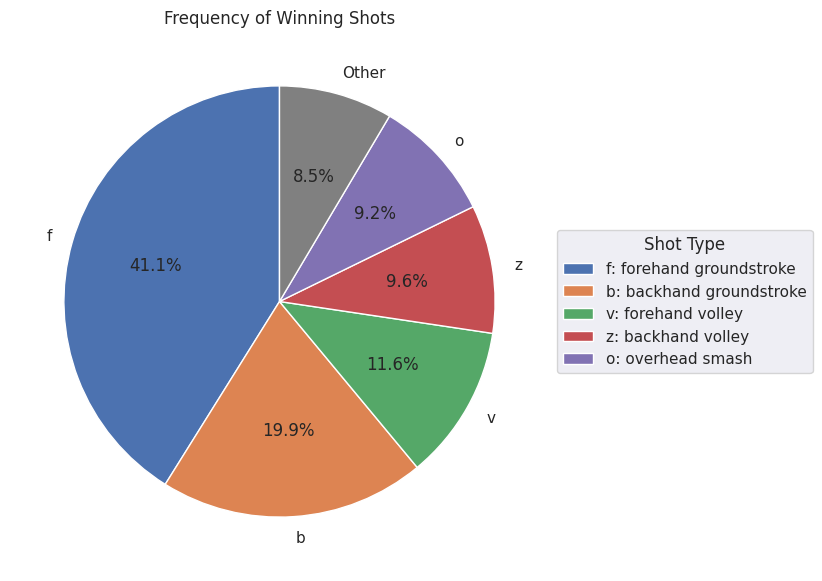

In [ ]:
non_blank_winning_shots = points_df[points_df['rally_winning_shot'] != '']

winning_shots_counts = non_blank_winning_shots['rally_winning_shot'].value_counts()

threshold = 0.02 * non_blank_winning_shots.shape[0]
filtered_winning_shots_counts = winning_shots_counts[winning_shots_counts > threshold]

if filtered_winning_shots_counts.sum() < winning_shots_counts.sum():
    filtered_winning_shots_counts['Other'] = winning_shots_counts[winning_shots_counts <= threshold].sum()

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
category_colors = default_colors[:len(filtered_winning_shots_counts)-1] + ['gray']  # 'Other' is the last category

plt.figure(figsize=(10, 7))
filtered_winning_shots_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=category_colors)
plt.title('Frequency of Winning Shots')
plt.ylabel('')

legend_mapping = {
    'f': 'forehand groundstroke',
    'b': 'backhand groundstroke',
    'v': 'forehand volley',
    'z': 'backhand volley',
    'o': 'overhead smash'
}
legend_labels = [f"{char}: {desc}" for char, desc in legend_mapping.items()]
plt.legend(title="Shot Type", labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Text(0.5, 0, 'Year')

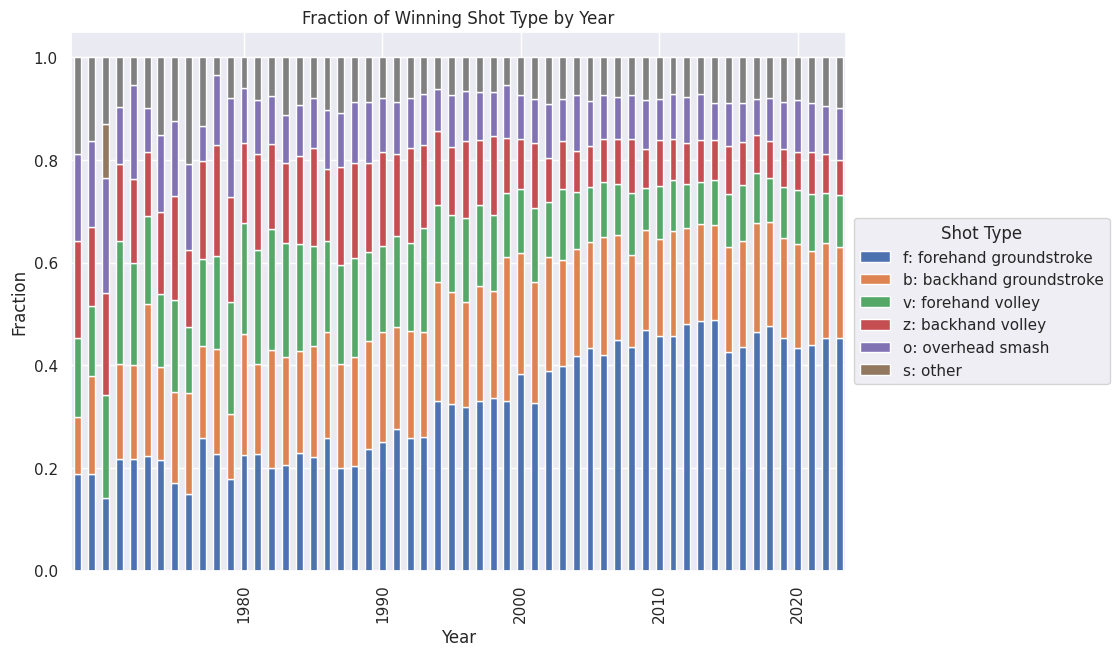

In [ ]:
yearly_distribution = non_blank_winning_shots.groupby(['year', 'rally_winning_shot']).size().unstack(fill_value=0)
yearly_distribution_fraction = yearly_distribution.div(yearly_distribution.sum(axis=1), axis=0)

top_5_yearly_distribution = yearly_distribution_fraction.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)
top_5_yearly_distribution['Other'] = yearly_distribution_fraction.apply(lambda x: x.sort_values(ascending=False)[5:].sum(), axis=1)
top_5_yearly_distribution_fraction = top_5_yearly_distribution.div(top_5_yearly_distribution.sum(axis=1), axis=0)

desired_order_with_other = ['f', 'b', 'v', 'z', 'o', 's', 'Other']
reordered_top_5 = top_5_yearly_distribution_fraction[desired_order_with_other]

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
category_colors = default_colors[:len(desired_order_with_other)-1] + ['gray']  # 'Other' is the last category

reordered_top_5.plot(kind='bar', stacked=True, figsize=(10, 7), color=category_colors)

legend_mapping = {
    'f': 'forehand groundstroke',
    'b': 'backhand groundstroke',
    'v': 'forehand volley',
    'z': 'backhand volley',
    'o': 'overhead smash',
    's': 'other',
}
legend_labels = [f"{char}: {desc}" for char, desc in legend_mapping.items()]
plt.legend(title="Shot Type", labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(ticks=[reordered_top_5.index.get_loc(year) for year in [1980, 1990, 2000, 2010, 2020]])

plt.title('Fraction of Winning Shot Type by Year')
plt.ylabel('Fraction')
plt.xlabel('Year')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# We have a rally with three shots; given the first two shots (2 character info), attempt to predict the winner

rally_df = points_df[['rally_seq', 'PtWinner', 'Svr']].copy()

pattern = r"[0-9][fbrsvzopuylmhijkt]"

rally_df['matches'] = rally_df['rally_seq'].str.findall(pattern)
rally_df['numMatches'] = rally_df['matches'].apply(len)
rally_df['winnerIsServer'] = (rally_df['Svr'] == rally_df['PtWinner'])

In [ ]:
filter_rally_df = rally_df[(rally_df['numMatches'] == 2) | (rally_df['numMatches'] == 3)] # Modify this filter condition, but lower bound must always be bigger than extractLim
display(filter_rally_df)

print("Server wins: " + str(filter_rally_df[filter_rally_df['winnerIsServer'] == True].shape[0]))
print("Returner wins: " + str(filter_rally_df[filter_rally_df['winnerIsServer'] == False].shape[0]))

,rally_seq,PtWinner,Svr,matches,numMatches,winnerIsServer
3,4b29f2b1d@,1,1,"[4b, 9f, 2b]",3,True
8,5b27s-3d@,1,2,"[5b, 7s]",2,False
21,4s27f+3*,2,2,"[4s, 7f]",2,True
22,4f28f2d#,1,2,"[4f, 8f]",2,False
27,4b29f2f2n@,1,1,"[4b, 9f, 2f]",3,True
...,...,...,...,...,...,...
246612,6f28b1w@,2,1,"[6f, 8b]",2,False
246613,6b38b2f2d@,1,1,"[6b, 8b, 2f]",3,True
246616,4r17f+3b3*,1,2,"[4r, 7f, 3b]",3,False
246617,4b39b1d#,1,2,"[4b, 9b]",2,False


Server wins: 120293
Returner wins: 87390


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.61


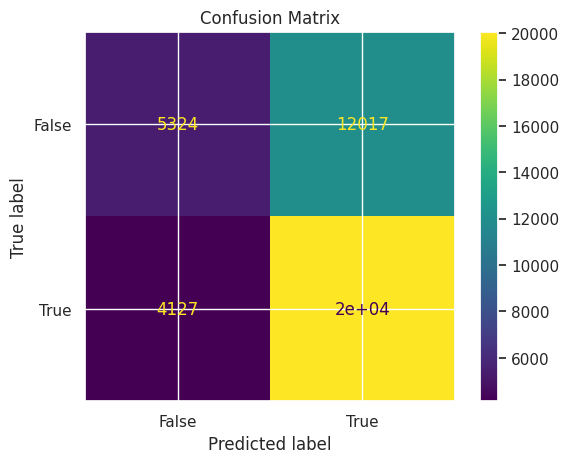

In [10]:
extractLim = 2 # Given n shots, make a prediction

for i in range(extractLim):
  filter_rally_df[f'Shot_{i+1}'] = filter_rally_df['matches'].apply(lambda x: x[i] if len(x) > i else None)
  filter_rally_df = filter_rally_df.dropna(subset=[f'Shot_{i+1}'])

shot_columns = [f'Shot_{i+1}' for i in range(extractLim)]

X = filter_rally_df[shot_columns]
y = filter_rally_df['winnerIsServer']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()